In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Set random seed for reproducibility
np.random.seed(42)

n_samples = 50

# Generate data for class 1 (centered around (-1, -1))
class_1 = np.random.normal(loc=[-1, -1], scale=0.2, size=(n_samples, 2))

# Generate data for class 2 (centered around (1, 1))
class_2 = np.random.normal(loc=[1, 1], scale=0.2, size=(n_samples, 2))

# Add a small amount of noise to make the data just barely linearly separable
class_1 += np.random.normal(scale=0.5, size=class_1.shape)
class_2 += np.random.normal(scale=0.5, size=class_2.shape)

# Combine the data and create labels
X = np.vstack((class_1, class_2))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

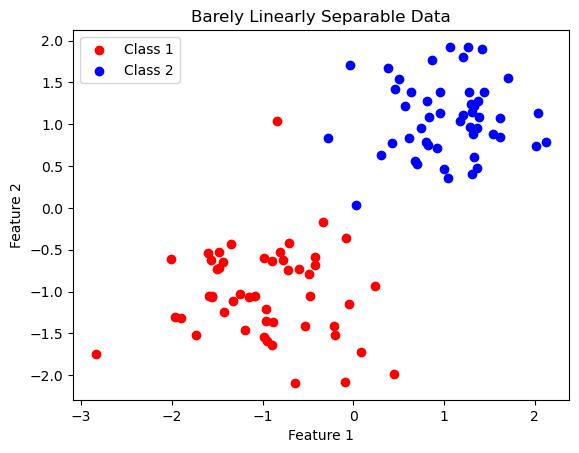

In [27]:
# Plot the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 2')
plt.title('Barely Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

C = 0.0001:
  Cross-validation error: 0.4714
  Training error: 0.4714

C = 0.001:
  Cross-validation error: 0.4714
  Training error: 0.4714

C = 0.01:
  Cross-validation error: 0.0000
  Training error: 0.0000

C = 0.1:
  Cross-validation error: 0.0000
  Training error: 0.0000

C = 1:
  Cross-validation error: 0.0000
  Training error: 0.0000

C = 10:
  Cross-validation error: 0.0000
  Training error: 0.0000

C = 100:
  Cross-validation error: 0.0000
  Training error: 0.0000

C = 1000:
  Cross-validation error: 0.0000
  Training error: 0.0000


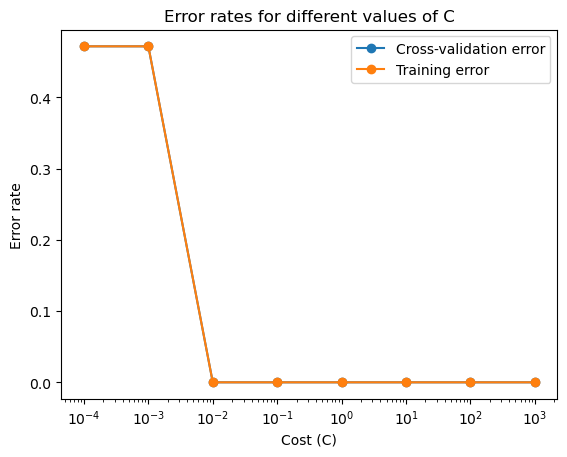

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of cost (C) values to evaluate
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Initialize lists to store cross-validation errors and training errors
cv_errors = []
training_errors = []

# Loop over different C values
for C in C_values:
    # Train an SVM with the current value of C
    svm = SVC(C=C, kernel='linear')
    
    # Perform 5-fold cross-validation and compute the average cross-validation error
    cv_error = 1 - np.mean(cross_val_score(svm, X_train, y_train, cv=5))
    cv_errors.append(cv_error)
    
    # Fit the model to the entire training data
    svm.fit(X_train, y_train)
    
    # Compute the training error (fraction of misclassified training samples)
    training_error = 1 - svm.score(X_train, y_train)
    training_errors.append(training_error)

    print(f"C = {C}:")
    print(f"  Cross-validation error: {cv_error:.4f}")
    print(f"  Training error: {training_error:.4f}\n")

# Plot the cross-validation and training errors
plt.plot(C_values, cv_errors, label='Cross-validation error', marker='o')
plt.plot(C_values, training_errors, label='Training error', marker='o')
plt.xscale('log')
plt.xlabel('Cost (C)')
plt.ylabel('Error rate')
plt.title('Error rates for different values of C')
plt.legend()
plt.show()

C = 0.0001:
  Test error: 0.5667
C = 0.001:
  Test error: 0.5667
C = 0.01:
  Test error: 0.0333
C = 0.1:
  Test error: 0.0667
C = 1:
  Test error: 0.0333
C = 10:
  Test error: 0.0667
C = 100:
  Test error: 0.0667
C = 1000:
  Test error: 0.0667


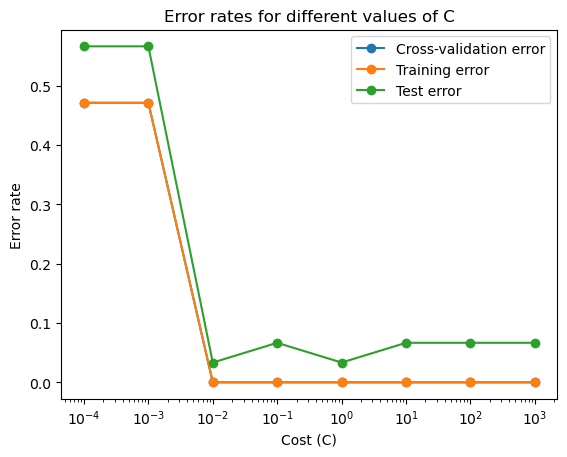

The value of C that leads to the fewest test errors is: 0.01


In [29]:
# Initialize a list to store test errors
test_errors = []

# Loop over different C values again to compute test errors
for C in C_values:
    # Train an SVM with the current value of C
    svm = SVC(C=C, kernel='linear')
    svm.fit(X_train, y_train)
    
    # Compute the test error (fraction of misclassified test samples)
    test_error = 1 - svm.score(X_test, y_test)
    test_errors.append(test_error)
    
    print(f"C = {C}:")
    print(f"  Test error: {test_error:.4f}")

# Plot all error rates together for comparison
plt.plot(C_values, cv_errors, label='Cross-validation error', marker='o')
plt.plot(C_values, training_errors, label='Training error', marker='o')
plt.plot(C_values, test_errors, label='Test error', marker='o')
plt.xscale('log')
plt.xlabel('Cost (C)')
plt.ylabel('Error rate')
plt.title('Error rates for different values of C')
plt.legend()
plt.show()

# Identify the best C value
min_test_error = min(test_errors)
best_C = C_values[test_errors.index(min_test_error)]
print(f"The value of C that leads to the fewest test errors is: {best_C}")